In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-stroke-dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data = data.drop('id', axis=1)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
def label_transform(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)
  return Encoded_le

In [8]:
data_transformed = data.copy()
catagoral_labels = ['gender','ever_married','work_type' ,'Residence_type','smoking_status']
for x in catagoral_labels:
  data[x] = label_transform(data[x])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [9]:
scaler = StandardScaler()
data[['age','hypertension','heart_disease','avg_glucose_level','bmi']] = \
scaler.fit_transform(data[['age','hypertension','heart_disease','avg_glucose_level','bmi']])

In [10]:
data = np.array(data)
print(data.ndim)
print(data.shape)
# data[:,4].sum()


2
(5110, 11)


In [11]:
data

array([[ 1.00000000e+00,  1.05143428e+00, -3.28601864e-01, ...,
         1.00123401e+00,  1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  7.86070073e-01, -3.28601864e-01, ...,
         4.61555355e-16,  2.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.62639008e+00, -3.28601864e-01, ...,
         4.68577254e-01,  2.00000000e+00,  1.00000000e+00],
       ...,
       [ 0.00000000e+00, -3.63841511e-01, -3.28601864e-01, ...,
         2.21736316e-01,  2.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  3.43796387e-01, -3.28601864e-01, ...,
        -4.27845098e-01,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.42048064e-02, -3.28601864e-01, ...,
        -3.49895329e-01,  0.00000000e+00,  0.00000000e+00]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.20, random_state=42)

In [13]:
print(X_train.shape)
print(X_train[:,10].sum())

(4088, 11)
187.0


In [14]:
print(X_test.shape)
print(X_test[:,10].sum())

(1022, 11)
62.0


In [15]:
weights = np.array([-0.25, -2.25, -3, 0.4, 2.5, 5.6, -4.7, 2.8, -1.9, 6.5 ])
threshold = -0.25

In [16]:
threshold

-0.25

# Adapt Weights

In [17]:
# TRAINING

print("Training:")
epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in X_train:
        y = row[10]
        net = sum(weights * row[0:10])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)


        if y == predicted_y:
            true_positive += 1
            continue
        elif predicted_y == 0 and y == 1:
            weights[0:10] = weights[0:10] + row[0:10]
        else:
            weights[0:10] = weights[0:10] - row[0:10]

    err = 1 - (true_positive / len(X_train))
    print(f"Epoch: {epoch}\tTrue Detection: {true_positive}({len(X_train)})\tErr: {err:.2f}")

    if err <= 0.1:
        print(f"\nNew Weights: {weights}")
        break

    

Training:
Epoch: 1	True Detection: 3716(4088)	Err: 0.09

New Weights: [ 0.75        4.57273026 -1.94293135 -0.32376639 -4.5        -5.4
 -2.7         2.84728495 -0.08700755 -2.5       ]


In [18]:
# TESTING

true_positive = 0
for row in X_test:
    y = row[10]
    net = sum(weights * row[0:10])

    if net >= threshold:
        predicted_y = 1
    else:
        predicted_y = 0

    if y == predicted_y:
        true_positive += 1

accuracy = (true_positive / len(X_test)) * 100
print(f"\nTesting:\nTrue Positive: {true_positive}({len(X_test)})\tAccuracy: {accuracy:.2f}%")


Testing:
True Positive: 952(1022)	Accuracy: 93.15%


In [19]:
weights = np.array([-0.25, -2.25, -3, 0.4, 2.5, 5.6, -4.7, 2.8, -1.9, 6.5 ])
threshold = -0.20
learning_rate = 0.6

In [20]:
threshold

-0.2

# Adapt Weights - Modified Version

In [21]:
# TRAINING

print("Training:")
epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in X_train:
        y = row[10]
        net = sum(weights * row[0:10])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)

        if y == predicted_y:
            true_positive += 1
            continue
        elif predicted_y == 0 and y == 1:
            weights[0:10] = weights[0:10] + (learning_rate * row[0:10])
        else:
            weights[0:10] = weights[0:10] - (learning_rate * row[0:10])

    err = 1 - (true_positive / len(X_train))
    print(f"Epoch: {epoch}\tTrue Positive: {true_positive}({len(X_train)})\tErr: {err:.2f}")

    if err <= 0.1:
        print(f"\nNew Weights: {weights}")
        break

Training:
Epoch: 1	True Positive: 3724(4088)	Err: 0.09

New Weights: [ 0.35        3.57168159 -1.1827921   0.82594864 -2.9        -2.8
 -1.1         2.85071322 -0.5503384  -2.5       ]


In [22]:
# TESTING

true_positive = 0
for row in X_test:
    y = row[10]
    net = sum(weights * row[0:10])

    if net >= threshold:
        predicted_y = 1
    else:
        predicted_y = 0

    if y == predicted_y:
        true_positive += 1

accuracy = (true_positive / len(X_test)) * 100
print(f"\nTesting:\nTrue Positive: {true_positive}({len(X_test)})\tAccuracy: {accuracy:.2f}%")


Testing:
True Positive: 947(1022)	Accuracy: 92.66%


In [23]:
weights = np.array([-0.25, -2.25, -3, 0.4, 2.5, 5.6, -4.7, 2.8, -1.9, 6.5 ])
threshold = -0.20
learning_rate = 0.6

# Adapt Weights - Widro Hoff Delta Rule

In [24]:
# TRAINING

print("Training:")
epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in X_train:
        y = row[10]
        net = sum(weights * row[0:10])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)
        
        delta = y - predicted_y

        if y == predicted_y:
            true_positive += 1
            continue
        else:
            weights[0:10] = weights[0:10] + (learning_rate * delta * row[0:10])

    err = 1 - (true_positive / len(X_train))
    print(f"Epoch: {epoch}\tTrue Positive: {true_positive}({len(X_train)})\tErr: {err:.2f}")

    if err <= 0.1:
        print(f"\nNew Weights: {weights}")
        break


Training:
Epoch: 1	True Positive: 3724(4088)	Err: 0.09

New Weights: [ 0.35        3.57168159 -1.1827921   0.82594864 -2.9        -2.8
 -1.1         2.85071322 -0.5503384  -2.5       ]


In [ ]:
predicted

In [26]:
y_pred = []
y_test = []

In [27]:
# TESTING

true_positive = 0
for row in X_test:
    y = row[10]
    net = sum(weights * row[0:10])

    if net >= threshold:
        predicted_y = 1
    else:
        predicted_y = 0

    if y == predicted_y:
        true_positive += 1
    y_pred.append(predicted_y)
    y_test.append(y)

accuracy = (true_positive / len(X_test)) * 100
print(f"\nTesting:\nTrue Positive: {true_positive}({len(X_test)})\tAccuracy: {accuracy:.2f}%")


Testing:
True Positive: 947(1022)	Accuracy: 92.66%


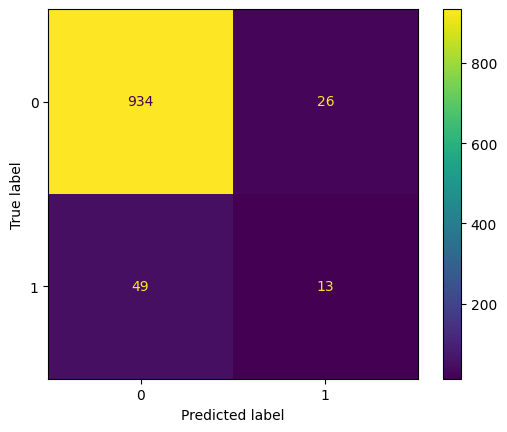

In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

# AND Problem using SLP

In [ ]:
weights = np.array([0.4, 0.4])
threshold = 0.3
learning_rate = 0.1

data = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])

epoch = 0
while True:
    epoch += 1
    true_positive = 0
    predicted = []

    for row in data:
        y = row[2]
        net = sum(weights * row[0:2])

        if net >= threshold:
            predicted_y = 1
        else:
            predicted_y = 0

        predicted.append(predicted_y)
        
        delta = y - predicted_y

        if y == predicted_y:
            true_positive += 1
            continue
        else:
            weights[0:2] = weights[0:2] + (learning_rate * delta * row[0:2])

    err = 1 - (true_positive / len(data))
    print(f"Epoch: {epoch}\tTrue Positive: {true_positive}({len(data)})\tErr: {err:.2f}")

print(f"\nNew Weights: {weights}")

Epoch: 1	True Positive: 2(4)	Err: 0.50
Epoch: 2	True Positive: 2(4)	Err: 0.50
Epoch: 3	True Positive: 4(4)	Err: 0.00

New Weights: [0.2 0.2]
